In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
pdb = 'structures/alanine_beta.pdb'
NH = np.genfromtxt(pdb)[[0,5],:][:,5:8]
XYZ = np.genfromtxt(pdb)[:,5:8]
m = np.genfromtxt(pdb)[[1,6,4,7,8,9,2,3],:][:,5:8]

In [23]:
class OBB:
    def __init__(self, vertex):
        self.vertex = vertex
        
    def Vertex(XYZ):
        # Compute scatter matrix
        scat = XYZ.T @ XYZ
        # Compute singular values or eigenvalues
        eigen_vecs, _, _ = np.linalg.svd(scat)
        #_, eigen_vecs = np.linalg.eig(scat)

        # project XY onto the "principal axes"
        XYZ_proj = XYZ @ eigen_vecs

        # compute min/max values (or whatever you need)
        min_x, min_y, min_z = np.min(XYZ_proj, 0)
        max_x, max_y, max_z = np.max(XYZ_proj, 0)

        #S radius
        Sr = 1.85

        ver_proj = np.array([[min_x - Sr, min_y - Sr, min_z - Sr],
                         [min_x - Sr, max_y + Sr, min_z - Sr],
                         [max_x + Sr, min_y - Sr, min_z - Sr],
                         [max_x + Sr, max_y + Sr, min_z - Sr],
                         [min_x - Sr, min_y - Sr, max_z + Sr],
                         [min_x - Sr, max_y + Sr, max_z + Sr],
                         [max_x + Sr, min_y - Sr, max_z + Sr],
                         [max_x + Sr, max_y + Sr, max_z + Sr]])

        # project min/max values back to the original system
        vertex = ver_proj @ eigen_vecs.T
        #ver = ver_proj @ eigen_vecs.T # use this with eigenvalues
        return vertex, eigen_vecs
    
class Node:    
    # Constructor to create a new node
    def __init__(self, obb):
        self.obb = OBB() 
        self.left = None
        self.right = None
        
class BVH:
    def __init__(self, parent, child):
        self.parent = parent
        self.child = child
    
    #def create_node(obb, parents, childs):
        
    
    #def combine_nodes(a = OBB(), b = OBB()):

In [18]:
a = BVH(OBB(OBB.Vertex(NH)),OBB(OBB.Vertex(m)))
ver = OBB.Vertex(NH)
ver2 = OBB.Vertex(m)

<IPython.core.display.Javascript object>


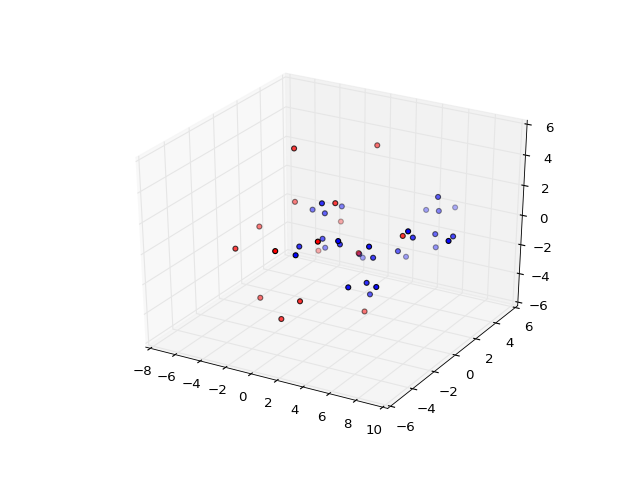

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XYZ[:,0], XYZ[:,1], XYZ[:,2])
ax.scatter(ver[0][:,0],  ver[0][:,1], ver[0][:,2], c ='r')
ax.scatter(ver2[0][:,0],  ver2[0][:,1], ver2[0][:,2], c ='r');